<hr/>
<h1><center> Data Modelling - Phnom Penh</center></h1>
<hr/>

***

### Data Description

1. Date
2. Time 
3. Water Content (m3/m3)
4. Solar Radiation (W/m2)
5. Rain (mm)
6. Temperature (Celcuis)
7. RH (%)
8. Wind Speed (m/s)
9. Gust Speed (m/s)
10. Wind Direction (Degree)
11. Dew Point (Celcuis)

# Import Packages
***

In [397]:
# importing the required modules
import glob
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#important libraries for statistical 

from datetime import datetime, date 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# Read the Data
***

In [516]:
# specifying the path to csv files
# change ur directory here based on pwd

#path = "/Users/votanasrey/Documents/Term10/ProjectII/Cambodia_Weather_Forcasting_Prediction_With_Time_Series/datasets/intermediate_layer/phnom_penh"
path = "../datasets/intermediate_layer/phnom_penh"

# csv files in the path
#data = pd.read_csv(path + "/cleaned_dataset_phnom_penh.csv")
#data.drop("Unnamed: 0", axis=1, inplace=True)
data1 = pd.read_csv(path + "/cleaned_dataset_phnom_penh.csv")
data1.drop("Unnamed: 0", axis=1, inplace=True)

In [517]:
#import another dataset after fixed 
data2 = pd.read_excel(path + "/missed_month_cleaned_dataset.xlsx")

# Rename Columns
# Renaming certain columns for better readability
data2.rename(
    columns={'Date': 'date', 
                        'Time': 'time',
                        'Water Content (m3/m3)': 'water_content',
                        'Solar Radiation (W/m2)': 'solar_radiation',
                        'Rain (mm)': 'rain',
                        'Temperature (Celcius)': 'temperature',
                        'RH (%)': 'rh',
                        'Wind Speed (m/s)' : 'wind_speed',
                        'Gust Speed (m/s)' : 'gust_speed',
                        'Wind Direction (Degree)' : 'wind_direction',
                        'Dew Point (Celcius)' : 'dew_point',
}, inplace=True)

In [518]:
#drop the index before concat 
data1 = data1.reset_index(drop=True)
data2 = data2.reset_index(drop=True)

#convert to date time 
data1['date'] = pd.to_datetime(data1['date'], yearfirst=True)
data2['date'] = pd.to_datetime(data2['date'], yearfirst=True)

#set index 
#data1 = data1.set_index('date')
#data2 = data2.set_index('date')

In [519]:
#merge the dataset 
combine_data_frames = [data1, data2]
#using concat function to concat dataframes as vertical 
data = pd.concat(combine_data_frames)
data.tail()

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
25054,2021-10-30,23:40:00,0.3069,1,0.0,27.65,89.2,0.0,0.0,257.0,25.75
25055,2021-10-30,23:45:00,0.3066,1,0.0,27.58,89.2,0.0,0.0,257.0,25.67
25056,2021-10-30,23:50:00,0.3069,1,0.0,27.60,89.1,0.0,0.3,327.0,25.68
25057,2021-10-30,23:55:00,0.3069,1,0.0,27.60,89.0,0.0,0.7,0.0,25.66
25058,2021-10-31,00:00:00,0.3066,1,0.0,27.65,89.2,0.0,0.7,3.0,25.75


In [520]:
# convert to date
#data['date'] = pd.to_datetime(data['date'])
#data['date'] = pd.to_datetime(data['date'], yearfirst=True)
# verify datatype
#data.info()

In [521]:
#sort the dataframe by and time a
data.sort_values(by=['date'], inplace=True)
#drop the index
#data = data.reset_index(drop=True)
#data.sort_index(axis=0 , ascending=True)
data.tail()

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
24576,2022-03-30,07:50:00,0.2780,167,0.0,26.11,90.1,0.0,0.0,41.0,24.39
24575,2022-03-30,07:45:00,0.2780,148,0.0,25.91,90.3,0.0,0.0,41.0,24.23
24574,2022-03-30,07:40:00,0.2780,136,0.0,25.89,90.2,0.0,0.0,42.0,24.19
24484,2022-03-30,00:10:00,0.2783,1,0.0,26.11,84.6,0.0,0.0,65.0,23.34
24770,2022-03-31,00:00:00,0.2780,1,0.0,27.92,82.4,0.0,0.0,31.0,24.68


In [546]:
#change the date data type 
#data['date'] = pd.to_datetime(data['date'], yearfirst=True)
#sort the index of data
#data = data.sort_index(ascending=True)

data = data.reset_index()

In [523]:
#data[data['date'] >= '21/01/30']
#check_date = data[(data['date'] > '2021-01-29') & (data['date'] < '2021-04-10')]
#check_date.tail()

# Data Quality Checking
***

In [547]:
#check the data missing 
data.isnull().any()

index              False
date               False
time               False
water_content      False
solar_radiation    False
rain               False
temperature        False
rh                 False
wind_speed         False
gust_speed         False
wind_direction     False
dew_point          False
dtype: bool

In [548]:
#sum it if it has any
data.isnull().sum()

index              0
date               0
time               0
water_content      0
solar_radiation    0
rain               0
temperature        0
rh                 0
wind_speed         0
gust_speed         0
wind_direction     0
dew_point          0
dtype: int64

In [549]:
#list all the columns which has in dataset 
for i,j in enumerate(data.columns):
    print(i, " ", j)

0   index
1   date
2   time
3   water_content
4   solar_radiation
5   rain
6   temperature
7   rh
8   wind_speed
9   gust_speed
10   wind_direction
11   dew_point


In [550]:
#check the number of columns and rows in dataframe
print("Number of rows in dataframe: ", data.shape[0])
print("**"*50)
print("Number of columns in dataframe: ", data.shape[1])

Number of rows in dataframe:  154514
****************************************************************************************************
Number of columns in dataframe:  12


In [551]:
#checking all datatype in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154514 entries, 0 to 154513
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   index            154514 non-null  int64         
 1   date             154514 non-null  datetime64[ns]
 2   time             154514 non-null  object        
 3   water_content    154514 non-null  float64       
 4   solar_radiation  154514 non-null  int64         
 5   rain             154514 non-null  float64       
 6   temperature      154514 non-null  float64       
 7   rh               154514 non-null  float64       
 8   wind_speed       154514 non-null  float64       
 9   gust_speed       154514 non-null  float64       
 10  wind_direction   154514 non-null  float64       
 11  dew_point        154514 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 14.1+ MB


,index,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
index,1.000000,0.249985,-0.032522,0.015583,-0.102944,0.115062,0.124045,0.120499,0.243528,0.013630
water_content,0.249985,1.000000,-0.003967,0.014114,-0.058106,0.027003,0.144606,0.174170,0.232780,-0.045405
solar_radiation,-0.032522,-0.003967,1.000000,-0.045037,0.701913,-0.584916,0.354663,0.326202,-0.084302,0.159847
rain,0.015583,0.014114,-0.045037,1.000000,-0.079296,0.098801,0.020493,0.028138,0.020235,0.012507
temperature,-0.102944,-0.058106,0.701913,-0.079296,1.000000,-0.707542,0.243014,0.222697,-0.105304,0.397640
rh,0.115062,0.027003,-0.584916,0.098801,-0.707542,1.000000,-0.359222,-0.357902,0.212797,0.359781
wind_speed,0.124045,0.144606,0.354663,0.020493,0.243014,-0.359222,1.000000,0.902133,0.108391,-0.135801
gust_speed,0.120499,0.174170,0.326202,0.028138,0.222697,-0.357902,0.902133,1.000000,0.150685,-0.156817
wind_direction,0.243528,0.232780,-0.084302,0.020235,-0.105304,0.212797,0.108391,0.150685,1.000000,0.140465
dew_point,0.013630,-0.045405,0.159847,0.012507,0.397640,0.359781,-0.135801,-0.156817,0.140465,1.000000


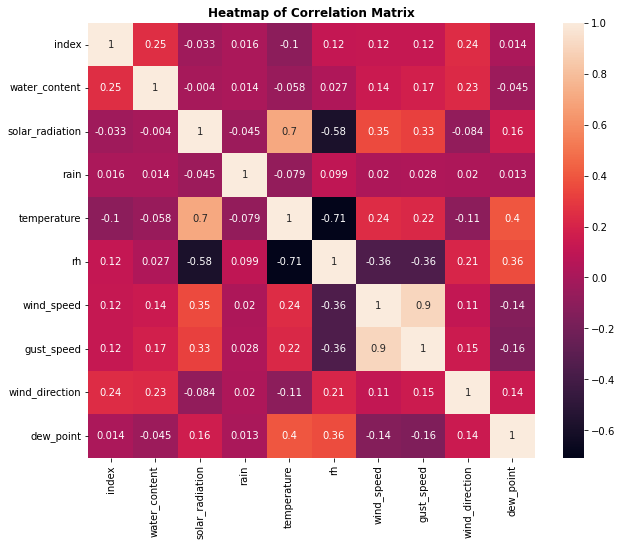

In [552]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?

plt.figure(figsize=(10,8))

correlation = data.corr()
correlation = (correlation)
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True)

plt.title('Heatmap of Correlation Matrix', fontweight='bold')
correlation

# Data Wrangling | Cleansing
***

In [553]:
#select only number features
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
numeric_features

['index',
 'water_content',
 'solar_radiation',
 'rain',
 'temperature',
 'rh',
 'wind_speed',
 'gust_speed',
 'wind_direction',
 'dew_point']

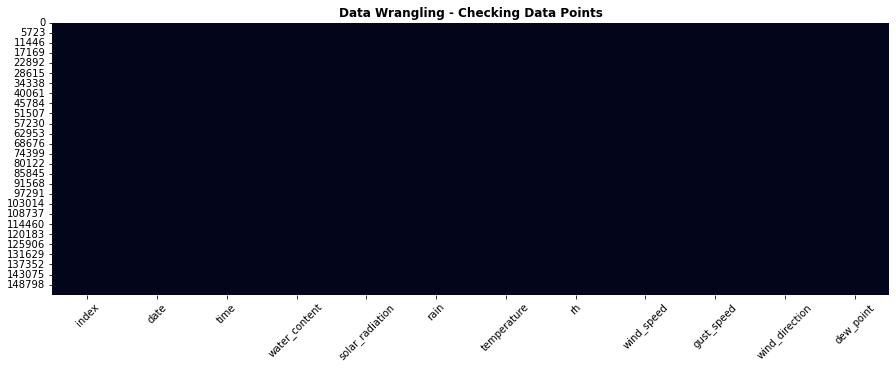

In [554]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Data Wrangling - Checking Data Points", fontweight='bold')
plt.xticks(rotation='45')
plt.show()

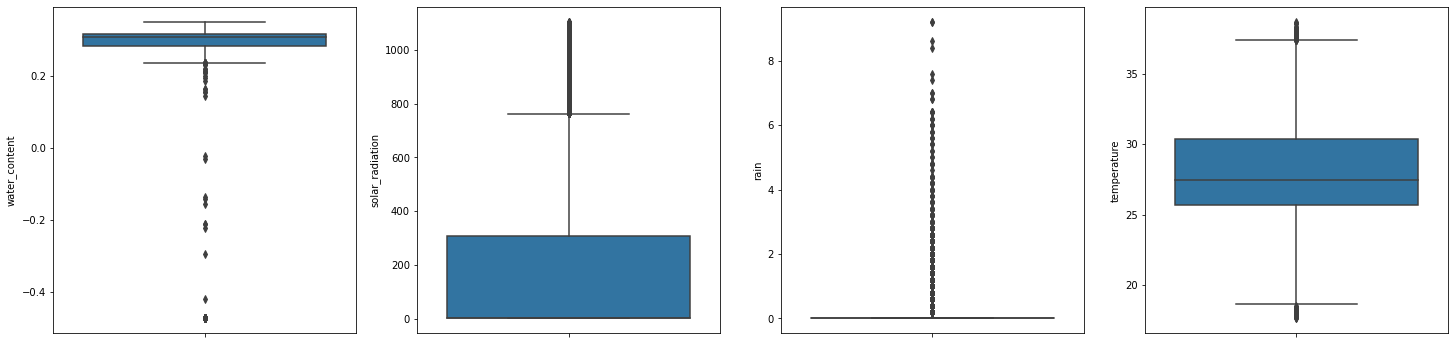

In [555]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['rain'], ax=axes[2])
sns.boxplot(y=data['temperature'], ax=axes[3])

print()
plt.show()

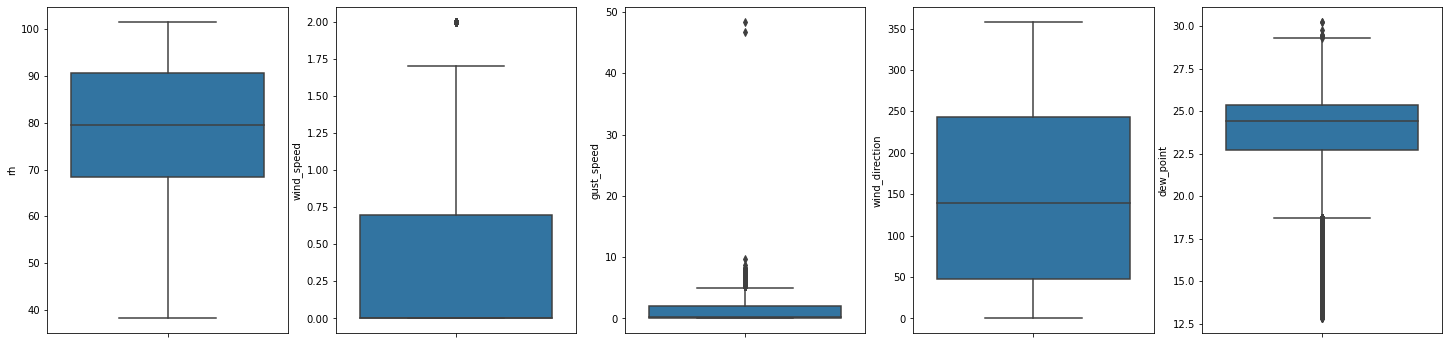

In [556]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=data['rh'], ax=axes[0])
sns.boxplot(y=data['wind_speed'], ax=axes[1])
sns.boxplot(y=data['gust_speed'], ax=axes[2])
sns.boxplot(y=data['wind_direction'], ax=axes[3])
sns.boxplot(y=data['dew_point'], ax=axes[4])

print()
plt.show()

In [557]:
#remove outlier from dataset
from scipy.stats import zscore

#create two columns more of zscore value
data['water_content_zscore'] = zscore(data.water_content)
data['solar_radiation_zscore'] = zscore(data.solar_radiation)
data['rain_zscore'] = zscore(data.rain)
data['temperature_zscore'] = zscore(data.temperature)
data['rh_zscore'] = zscore(data.rh)
data['wind_speed_zscore'] = zscore(data.wind_speed)
data['gust_speed_zscore'] = zscore(data.gust_speed)
data['wind_direction_zscore'] = zscore(data.wind_direction)
data['dew_point_zscore'] = zscore(data.dew_point)

#define zscore.
#Z score is in (-3,3) value, if it's out means that it has outlier
data[(data.water_content_zscore > 3.0) | (data.water_content_zscore < -3.0)]
data[(data.solar_radiation_zscore > 3.0) | (data.solar_radiation_zscore < -3.0)]
data[(data.rain_zscore > 3.0) | (data.rain_zscore < -3.0)]
data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)]
data[(data.rh_zscore > 3.0) | (data.rh_zscore < -3.0)]
data[(data.wind_speed_zscore > 3.0) | (data.wind_speed_zscore < -3.0)]
data[(data.gust_speed_zscore > 3.0) | (data.gust_speed_zscore < -3.0)]
data[(data.wind_direction_zscore > 3.0) | (data.wind_direction_zscore < -3.0)]
data[(data.dew_point_zscore > 3.0) | (data.dew_point_zscore < -3.0)]

#drop z_score
data = data.drop(data[(data.water_content_zscore > 3.0) | (data.water_content_zscore < -3.0)].index)
data = data.drop(data[(data.solar_radiation_zscore > 3.0) | (data.solar_radiation_zscore < -3.0)].index)
data = data.drop(data[(data.rain_zscore > 3.0) | (data.rain_zscore < -3.0)].index)
data = data.drop(data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)].index)
data = data.drop(data[(data.rh_zscore > 3.0) | (data.rh_zscore < -3.0)].index)
data = data.drop(data[(data.wind_speed_zscore > 3.0) | (data.wind_speed_zscore < -3.0)].index)
data = data.drop(data[(data.gust_speed_zscore > 3.0) | (data.gust_speed_zscore < -3.0)].index)
data = data.drop(data[(data.wind_direction_zscore > 3.0) | (data.wind_direction_zscore < -3.0)].index)
data = data.drop(data[(data.dew_point_zscore > 3.0) | (data.dew_point_zscore < -3.0)].index)


In [558]:
data

,index,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,...,dew_point,water_content_zscore,solar_radiation_zscore,rain_zscore,temperature_zscore,rh_zscore,wind_speed_zscore,gust_speed_zscore,wind_direction_zscore,dew_point_zscore
0,101890,2020-09-01,17:50:00,0.3062,1,0.2,25.84,96.4,0.0,0.3,...,25.26,0.221498,-0.670604,1.113754,-0.701258,1.298284,-0.607142,-0.542544,1.675202,0.635427
1,101871,2020-09-01,16:15:00,0.3084,8,0.0,25.16,94.2,0.0,0.7,...,24.19,0.238564,-0.644360,-0.081079,-0.914508,1.136493,-0.607142,-0.253632,1.321557,0.174881
2,101870,2020-09-01,16:10:00,0.3072,9,0.0,25.21,93.8,0.0,0.3,...,24.17,0.229255,-0.640611,-0.081079,-0.898828,1.107076,-0.607142,-0.542544,1.302944,0.166273
3,101869,2020-09-01,16:05:00,0.3062,12,0.0,25.09,93.7,0.0,0.7,...,24.03,0.221498,-0.629363,-0.081079,-0.936460,1.099722,-0.607142,-0.253632,1.219186,0.106015
4,101868,2020-09-01,16:00:00,0.3084,14,0.0,24.99,93.8,0.7,2.0,...,23.96,0.238564,-0.621865,-0.081079,-0.967821,1.107076,0.761667,0.685333,1.219186,0.075885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154509,24576,2022-03-30,07:50:00,0.2780,167,0.0,26.11,90.1,0.0,0.0,...,24.39,0.002738,-0.048237,-0.081079,-0.616585,0.834972,-0.607142,-0.759228,-0.977136,0.260965
154510,24575,2022-03-30,07:45:00,0.2780,148,0.0,25.91,90.3,0.0,0.0,...,24.23,0.002738,-0.119472,-0.081079,-0.679305,0.849681,-0.607142,-0.759228,-0.977136,0.192098
154511,24574,2022-03-30,07:40:00,0.2780,136,0.0,25.89,90.2,0.0,0.0,...,24.19,0.002738,-0.164463,-0.081079,-0.685577,0.842327,-0.607142,-0.759228,-0.967830,0.174881
154512,24484,2022-03-30,00:10:00,0.2783,1,0.0,26.11,84.6,0.0,0.0,...,23.34,0.005066,-0.670604,-0.081079,-0.616585,0.430494,-0.607142,-0.759228,-0.753781,-0.190973


<h3><center>After Removed Outlier</center></h3>

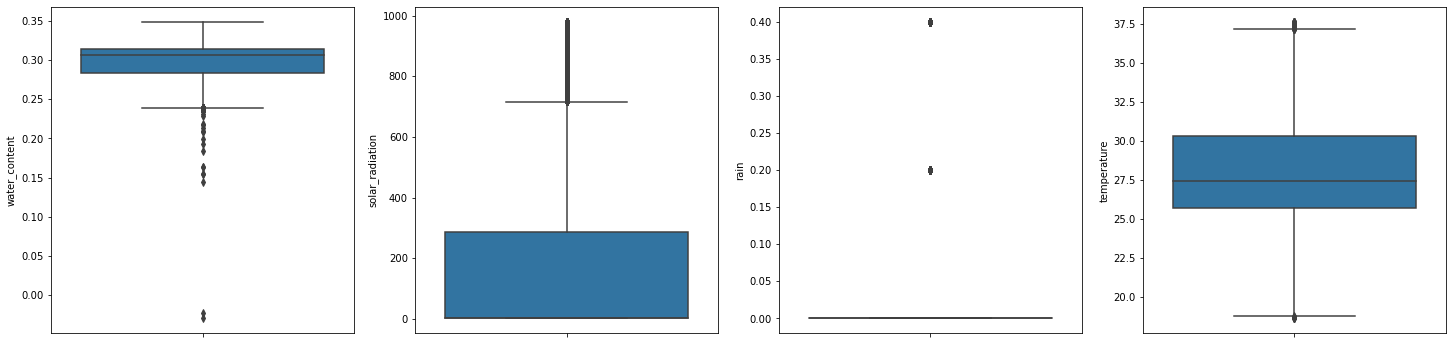

In [559]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['rain'], ax=axes[2])
sns.boxplot(y=data['temperature'], ax=axes[3])

print()
plt.show()

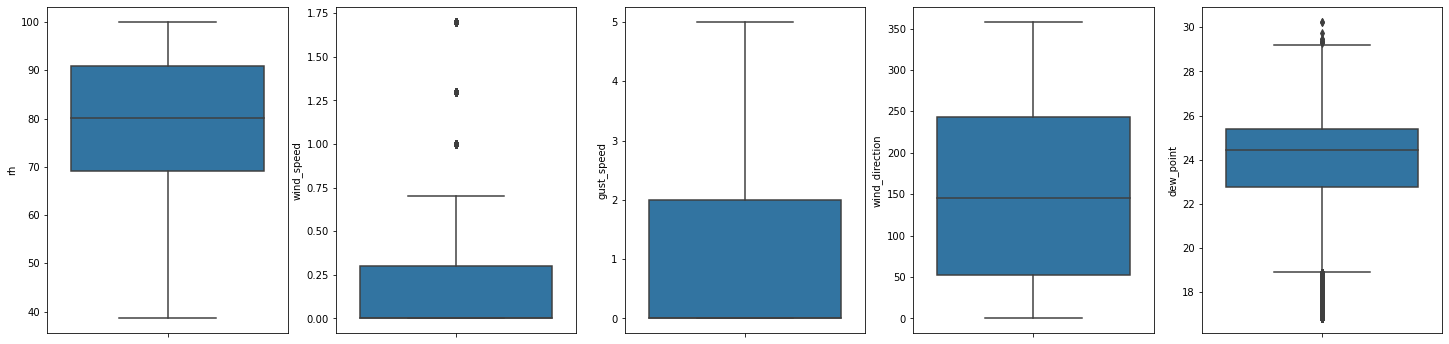

In [560]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=data['rh'], ax=axes[0])
sns.boxplot(y=data['wind_speed'], ax=axes[1])
sns.boxplot(y=data['gust_speed'], ax=axes[2])
sns.boxplot(y=data['wind_direction'], ax=axes[3])
sns.boxplot(y=data['dew_point'], ax=axes[4])

print()
plt.show()

In [561]:
#I can see some of features are appear with negative values soo, we can apply this method to remove them out 
#for cols in numeric_features:
#    data = data[data[cols] > 0]

#select data frame only positive values 
data['water_content'].abs()
data.shape

(143401, 21)

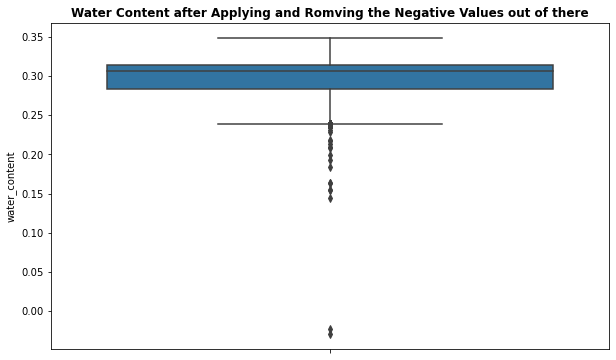

In [562]:
#Water Content after Applying and Romving the Negative Values out of there

sns.boxplot(y=data['water_content'])
plt.title("Water Content after Applying and Romving the Negative Values out of there", fontweight='bold')
plt.show()

In [563]:
#after removing z-score out, we should remove the feature name with z-score values too.

data.drop(['water_content_zscore',
          'water_content_zscore',
          'rain_zscore',
          'temperature_zscore',
          'rh_zscore',
          'wind_speed_zscore',
          'gust_speed_zscore',
          'wind_direction_zscore',
          'dew_point_zscore',
          'solar_radiation_zscore'], 
axis=1, inplace=True)
for i in data.columns:
    print(i)

index
date
time
water_content
solar_radiation
rain
temperature
rh
wind_speed
gust_speed
wind_direction
dew_point


# Exploratory Data Analysis
***

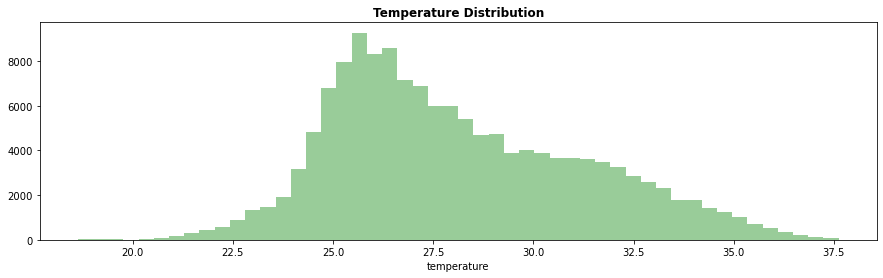

In [564]:
# Set up the matplotlib figure
plt.figure(figsize=(15,4))

# Temperature 
sns.distplot(data.temperature, kde = False, color="g").set_title('Temperature Distribution')
plt.title("Temperature Distribution", fontweight='bold')

plt.show()

In [565]:
solar_tem = data[['solar_radiation', 'temperature']]
#trigger on solar 
solar_tem['shift'] = solar_tem['solar_radiation'].apply(lambda x : "Night" if x == 1 else "Day")

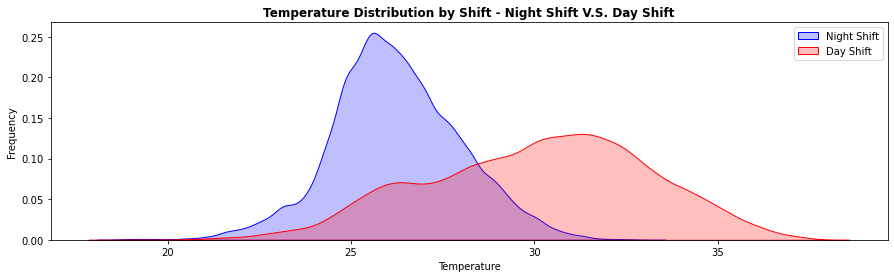

In [566]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(solar_tem.loc[(solar_tem['shift'] == "Night"),'temperature'] , color='b',shade=True, label='Night Shift')
ax=sns.kdeplot(solar_tem.loc[(solar_tem['shift'] == "Day"),'temperature'] , color='r',shade=True, label='Day Shift')
ax.set(xlabel='Temperature', ylabel='Frequency')
plt.legend()
plt.title('Temperature Distribution by Shift - Night Shift V.S. Day Shift', fontweight='bold');


In [567]:
#let's try with temperature values only first 
#select only date and temperature 

tem = data[['date', 'temperature']]
tem.tail()

,date,temperature
154509,2022-03-30,26.11
154510,2022-03-30,25.91
154511,2022-03-30,25.89
154512,2022-03-30,26.11
154513,2022-03-31,27.92


In [568]:
#check data points
tem.shape

(143401, 2)

In [569]:
#Parse strings to datetime type
tem['date'] = pd.to_datetime(tem['date'], yearfirst=True)
#set index from date 
#tem = tem.set_index(['date'])
#I'm going to consider the temperature just from 1900 until the end of 2012
#tem = tem.loc['2020-01-01':'2022-01-01']
#tem.head()

In [570]:
#let's sum and mean on daily temperature 
#tem = tem.append(tem.agg(['mean']).rename({'mean':'avg_daily_temperature'}))
  
tem = tem.groupby(['date'])['temperature'].mean()
tem = pd.DataFrame(tem)
tem.head()

,temperature
date,
2020-09-01,27.871903
2020-09-02,27.332662
2020-09-03,28.456184
2020-09-04,29.596703
2020-09-05,30.240791


In [571]:
#create a function for line plot 
def line_plot(x, y, title):
    plt.figure(figsize=(25,6))
    sns.lineplot(x=x, y=y)
    plt.title(title, fontweight='bold', fontsize=15)
    plt.show()

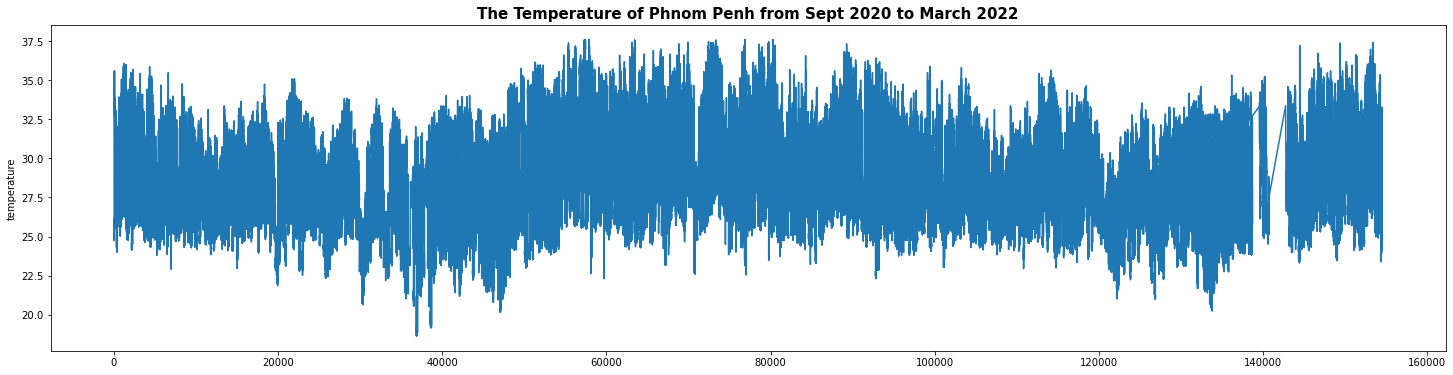

In [572]:
#draw a testing line plot
line_plot(data.date.index, data.temperature, "The Temperature of Phnom Penh from Sept 2020 to March 2022")

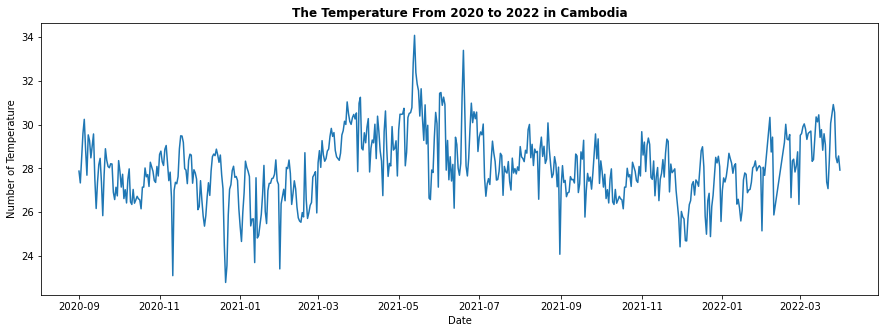

In [573]:
## plot line graph
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Number of Temperature')
plt.title('The Temperature From 2020 to 2022 in Cambodia', fontweight='bold')
plt.plot(tem)
plt.show()

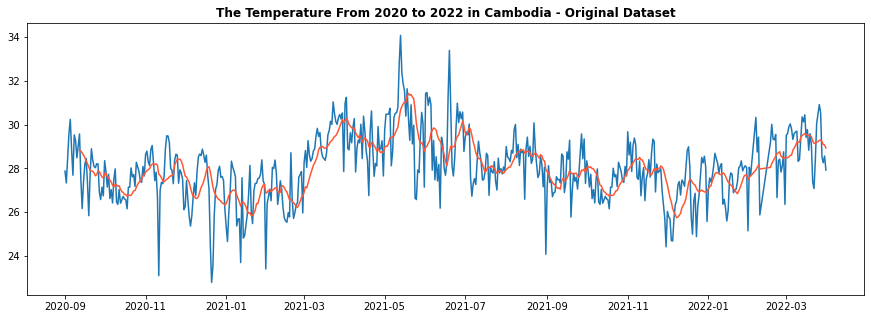

In [662]:
plt.figure(figsize=(15,5))
#check moving average in original dataset 
MA = tem.rolling(window=12).mean()
MA_STD = tem.rolling(window=12).std()
plt.title('The Temperature From 2020 to 2022 in Cambodia - Original Dataset', fontweight='bold')
plt.plot(tem)
plt.plot(MA, color='#FF5733')
plt.show()

In [574]:
tem.head()

,temperature
date,
2020-09-01,27.871903
2020-09-02,27.332662
2020-09-03,28.456184
2020-09-04,29.596703
2020-09-05,30.240791


In [575]:
#check the data between 2021-02 to 2021-04
# Why is this alway increase? 

#tem.loc['2021-2-1':'2021-4-1']
# Select the rows between two dates


start_date = '2021-01-30'
end_date = '2021-04-01'

#t = tem[(tem.index > start_date) & (tem.index <= end_date)]
t = tem[(tem.index >= start_date)]
t.sort_index(ascending=True)

,temperature
date,
2021-01-30,27.265135
2021-01-31,23.400000
2021-02-01,26.372394
2021-02-02,26.719132
2021-02-03,27.043420
...,...
2022-03-27,30.546620
2022-03-28,28.523056
2022-03-29,28.256241


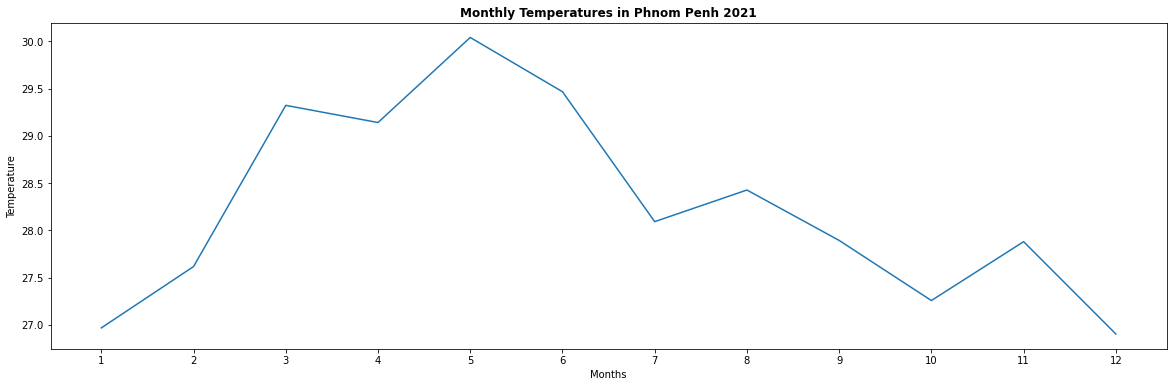

In [576]:
# we are going to create a pivot table to plot the monthly temperatures through the years

tem['month'] = tem.index.month
tem['year'] = tem.index.year
pivot = pd.pivot_table(tem, values='temperature', index='month', columns='year', aggfunc='mean')

monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Phnom Penh 2021', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

In [577]:
#check the pivot 
pivot

year,2020,2021,2022
month,,,
1,NaN,26.487819,27.447259
2,NaN,26.792543,28.441559
3,NaN,29.329051,29.317994
4,NaN,29.141720,NaN
5,NaN,30.042080,NaN
6,NaN,29.467908,NaN
7,NaN,28.092420,NaN
8,NaN,28.427370,NaN
9,28.052940,27.734443,NaN


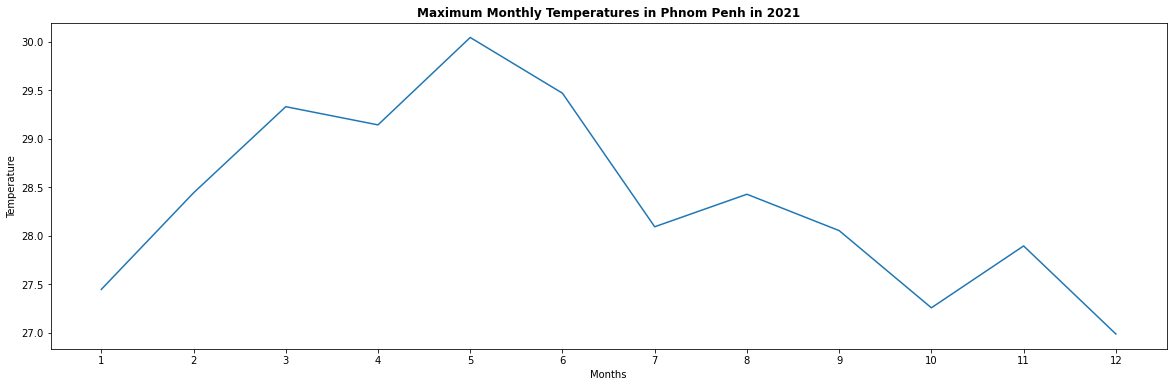

In [578]:
#define the pivot 
#idx=df.groupby(by='ad_id')['date'].idxmax()

max_tem_monthly = pivot.groupby("month").max()

max_monthly_seasonality = max_tem_monthly.max(axis=1)
max_monthly_seasonality.plot(figsize=(20,6))
plt.title('Maximum Monthly Temperatures in Phnom Penh in 2021', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

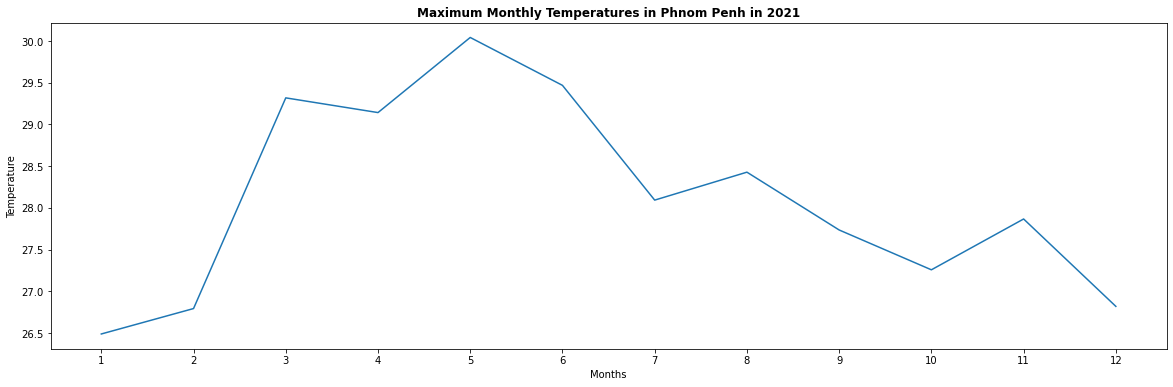

In [579]:
#define the pivot 
#idx=df.groupby(by='ad_id')['date'].idxmax()

min_tem_monthly = pivot.groupby("month").min()

min_tem_monthly = min_tem_monthly.min(axis=1)
min_tem_monthly.plot(figsize=(20,6))
plt.title('Maximum Monthly Temperatures in Phnom Penh in 2021', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

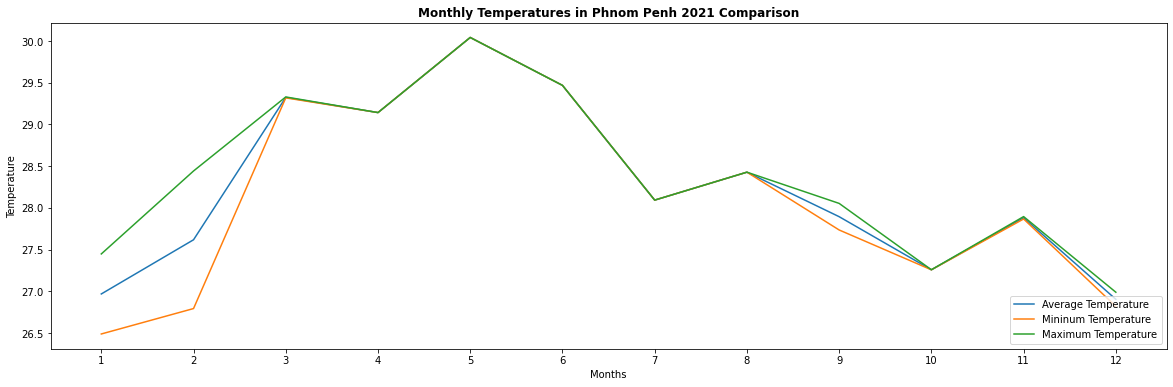

In [580]:
#select all the case in one plot 

#average 
monthly_seasonality.plot(figsize=(20,6), legend="Average Temperature")
#min
min_tem_monthly.plot(figsize=(20,6), legend="Mininum Temperature")
#max
max_monthly_seasonality.plot(figsize=(20,6), legend="Maximum Temperature")

plt.title('Monthly Temperatures in Phnom Penh 2021 Comparison', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend(["Average Temperature", "Mininum Temperature", "Maximum Temperature"], loc ="lower right")
plt.xticks([x for x in range(1,13)])
plt.show()

In [581]:
#check the tem
tem

,temperature,month,year
date,,,
2020-09-01,27.871903,9,2020
2020-09-02,27.332662,9,2020
2020-09-03,28.456184,9,2020
2020-09-04,29.596703,9,2020
2020-09-05,30.240791,9,2020
...,...,...,...
2022-03-27,30.546620,3,2022
2022-03-28,28.523056,3,2022
2022-03-29,28.256241,3,2022


In [582]:
#drop the month and year out 
tem.drop(['month', 'year'], axis=1, inplace=True)

In [583]:
#Determine rolling statistics
rolmean = tem.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = tem.rolling(window=12).std()
print(rolmean,rolstd)

            temperature
date                   
2020-09-01          NaN
2020-09-02          NaN
2020-09-03          NaN
2020-09-04          NaN
2020-09-05          NaN
...                 ...
2022-03-27    29.292107
2022-03-28    29.217645
2022-03-29    29.091533
2022-03-30    29.069555
2022-03-31    28.931117

[567 rows x 1 columns]             temperature
date                   
2020-09-01          NaN
2020-09-02          NaN
2020-09-03          NaN
2020-09-04          NaN
2020-09-05          NaN
...                 ...
2022-03-27     1.215990
2022-03-28     1.234886
2022-03-29     1.250570
2022-03-30     1.257925
2022-03-31     1.287556

[567 rows x 1 columns]


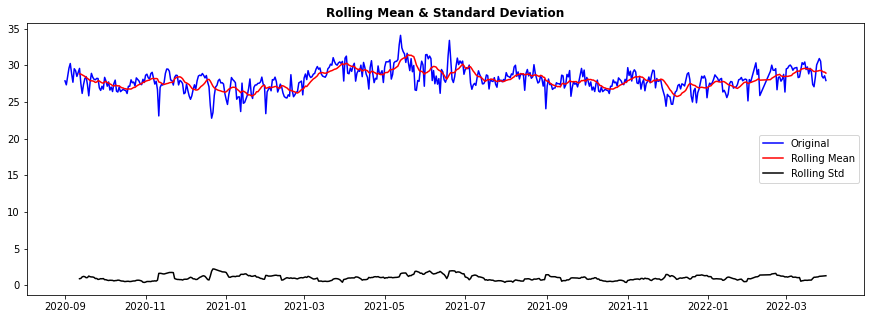

In [584]:
#Plot rolling statistics
plt.figure(figsize=(15,5))

orig = plt.plot(tem, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')

plt.title('Rolling Mean & Standard Deviation', fontweight='bold')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so. 

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

In [585]:
#Perform Augmented Dickey–Fuller test:

print('Results of Dickey Fuller Test:')
dftest = adfuller(data['temperature'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    -26.283579
p-value                             0.000000
#Lags Used                         74.000000
Number of Observations Used    143326.000000
Critical Value (1%)                -3.430396
Critical Value (5%)                -2.861560
Critical Value (10%)               -2.566781
dtype: float64


For a Time series to be stationary, its ADCF test should have:
1. p-value to be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that **our Time Series at the moment is not stationary**

In [586]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Cambodia Temperature Variation', fontweight='bold')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

In [587]:
#build the function to test the stationarity 

def test_stationarity(timeseries):
    plt.figure(figsize=(15,5))
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print(timeseries.iloc[:,0].values)
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.5354
p-value                          0.0071
Lags Used                       10.0000
Number of Observations Used    556.0000
Critical Value (1%)             -3.4422
Critical Value (5%)             -2.8668
Critical Value (10%)            -2.5695
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


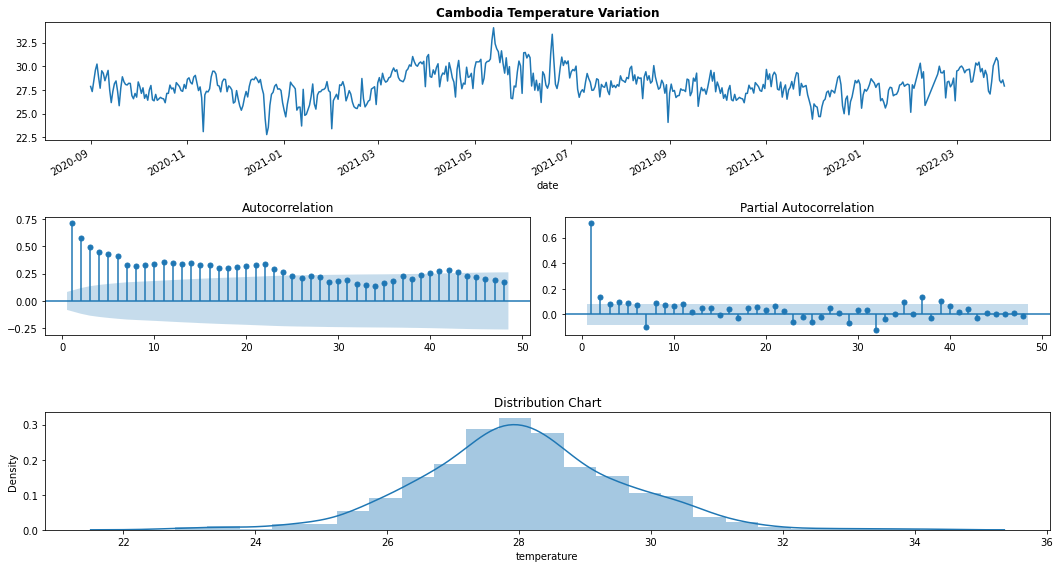

In [588]:
# The first approach is to check the series without any transformation
check_stationarity(tem['temperature'])

# Data Preprocessing
***

## Data Transformation to achieve Stationarity <a name="data-transform"></a>

There are a couple of ways to achieve stationarity through data transformation like taking $log_{10}$,$log_{e}$, square, square root, cube, cube root, exponential decay, time shift and so on ...

 lets start of with log transformations. Our objective is to remove the trend component. Hence,  flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

### Log Scale Transformation  <a name="log"></a>

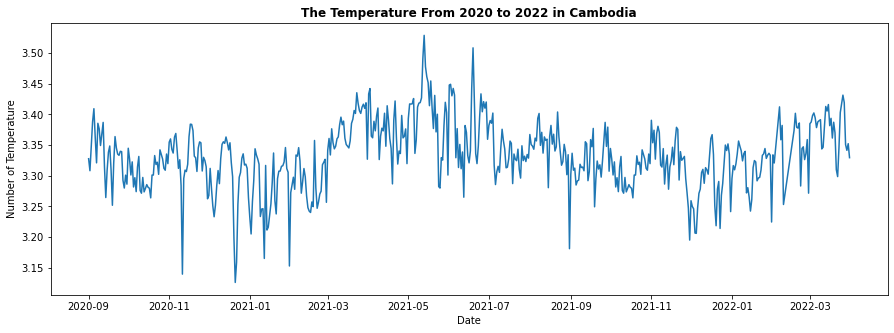

In [589]:
#Estimating trend
tem_logscale = np.log(tem)

## plot line graph
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Number of Temperature')
plt.title('The Temperature From 2020 to 2022 in Cambodia', fontweight='bold')
plt.plot(tem_logscale)
plt.show()

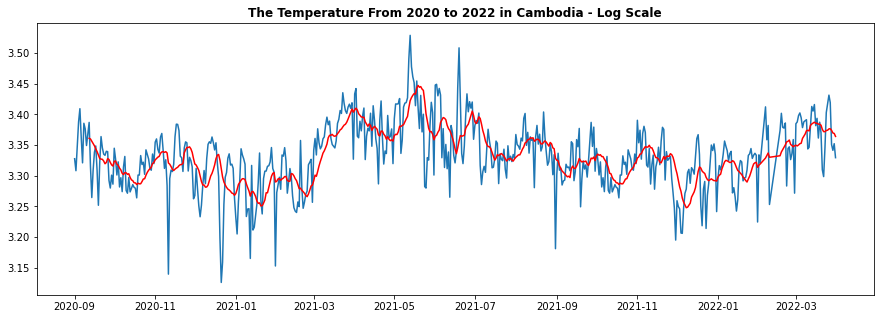

In [590]:
#The below transformation is required to make series stationary

plt.figure(figsize=(15,5))
movingAverage = tem_logscale.rolling(window=12).mean()
movingSTD = tem_logscale.rolling(window=12).std()
plt.title('The Temperature From 2020 to 2022 in Cambodia - Log Scale', fontweight='bold')
plt.plot(tem_logscale)
plt.plot(movingAverage, color='red')
plt.show()

In [591]:
datasetLogScaleMinusMovingAverage = tem_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,temperature
date,
2020-09-12,0.025952
2020-09-13,-0.045085
2020-09-14,-0.091813
2020-09-15,-0.044207
2020-09-16,-0.010554
2020-09-17,0.004733
2020-09-18,-0.030246
2020-09-19,-0.081712
2020-09-20,-0.007149


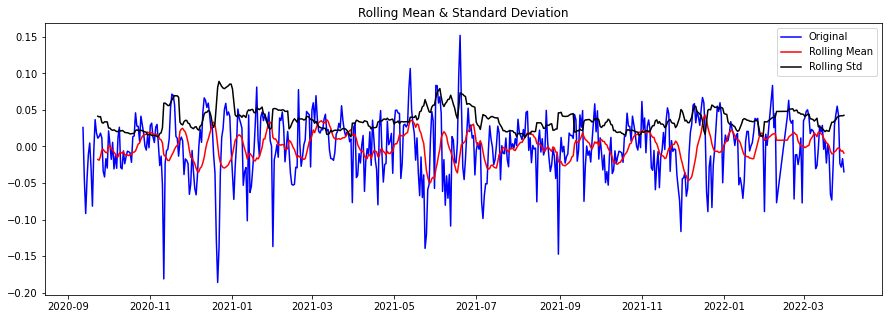

Results of Dickey-Fuller Test:
[ 2.59523504e-02 -4.50853521e-02 -9.18129404e-02 -4.42069208e-02
 -1.05537358e-02  4.73332708e-03 -3.02460191e-02 -8.17117969e-02
 -7.14855940e-03  3.67114024e-02  1.86194626e-02  1.12739563e-02
  1.37309046e-02  1.81958605e-02  1.14312118e-02 -3.39450319e-02
 -4.16946958e-02 -1.67495918e-02 -2.95232383e-02  2.12875041e-02
  3.07702866e-03 -1.76231196e-02  5.65170001e-03 -3.07898881e-02
 -1.26230507e-02 -2.98700341e-02  1.24253536e-02  2.63340680e-02
 -2.88806866e-02 -3.08039952e-02 -6.00964269e-03 -2.36297432e-02
 -1.40630456e-02 -6.48199871e-03 -7.33811638e-03 -8.75022442e-03
 -2.17108350e-02  1.32476261e-02  1.43307617e-02  4.59934350e-02
  2.79077468e-02  2.73798930e-02  7.21737117e-03  4.14058415e-02
  2.95870325e-02  1.84516634e-02  6.01116572e-04 -4.95273342e-03
  1.54817739e-02 -1.72573314e-03  2.88216508e-02  3.18429692e-02
  1.28356387e-02  5.47048125e-03  2.63570248e-02  3.01538651e-02
  2.49585934e-03 -2.60604009e-02 -1.31689965e-02 -5.3256141

In [592]:
#let's implement it 
test_stationarity(datasetLogScaleMinusMovingAverage)

Results of Dickey-Fuller Test:
Test Statistic                  -3.5493
p-value                          0.0068
Lags Used                       10.0000
Number of Observations Used    556.0000
Critical Value (1%)             -3.4422
Critical Value (5%)             -2.8668
Critical Value (10%)            -2.5695
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


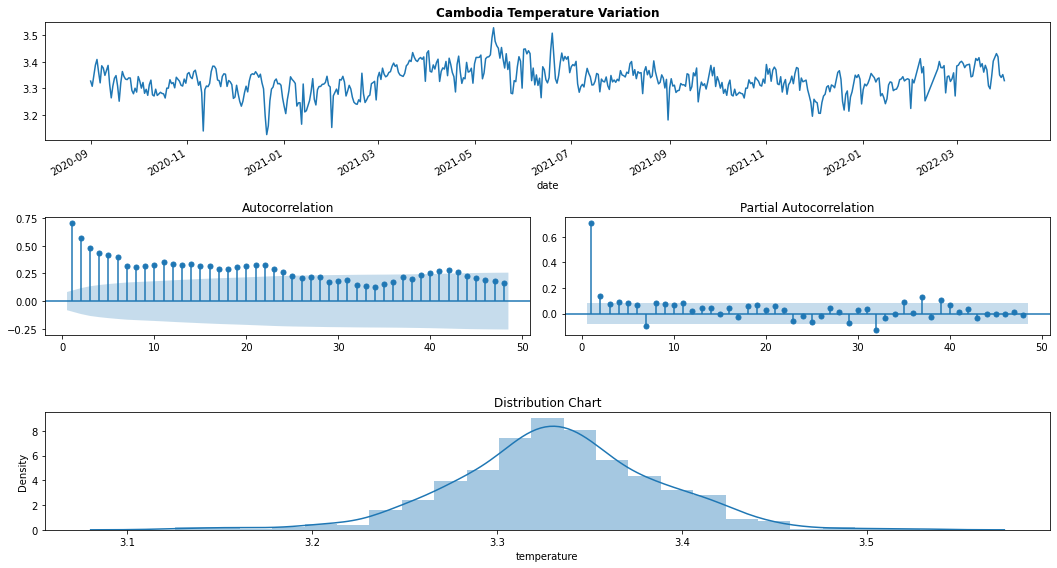

In [593]:
# The first approach is to check the series without any transformation
check_stationarity(tem_logscale['temperature'])

In [594]:
tem_logscale

,temperature
date,
2020-09-01,3.327619
2020-09-02,3.308082
2020-09-03,3.348365
2020-09-04,3.387663
2020-09-05,3.409192
...,...
2022-03-27,3.419254
2022-03-28,3.350713
2022-03-29,3.341314


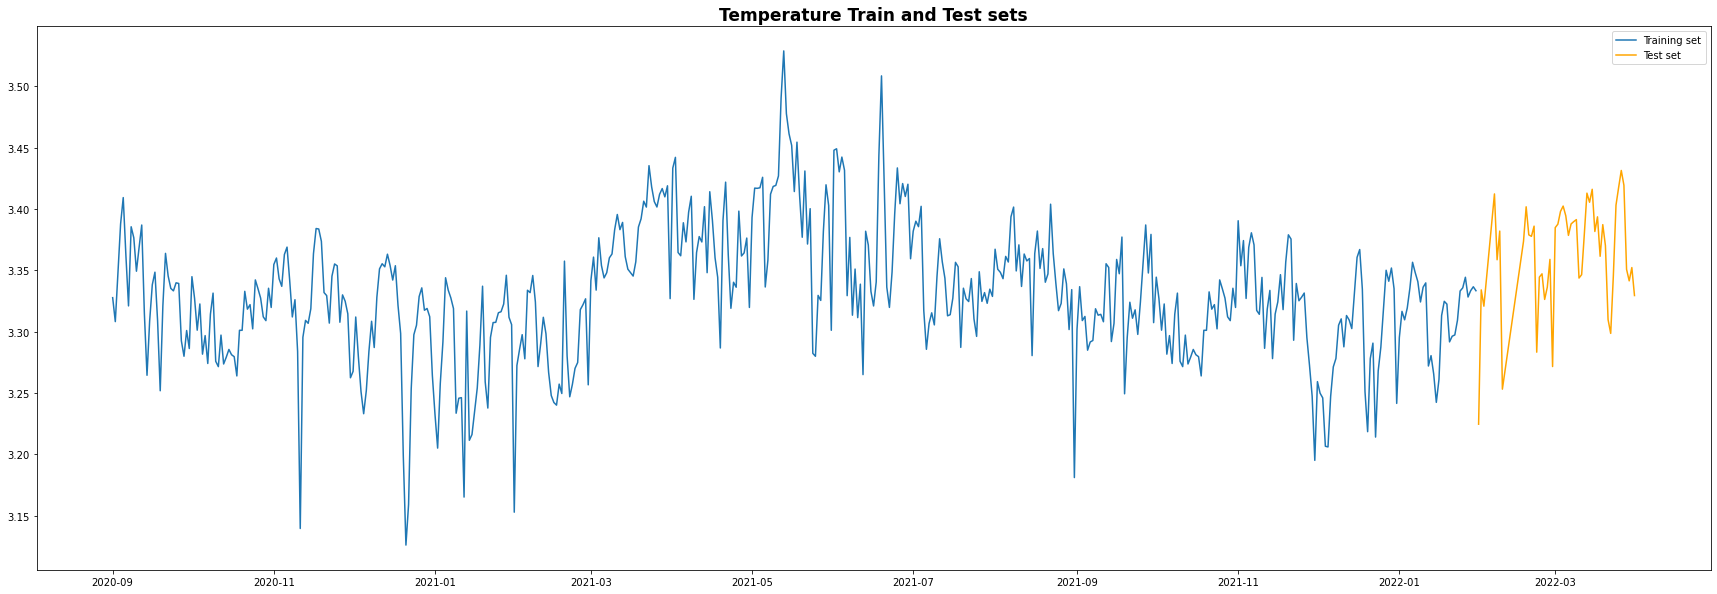

In [595]:
#data split into train and test sets 

test_size = 50

tem_train = tem_logscale[:-test_size]
tem_test = tem_logscale[-test_size:]

plt.figure(figsize=(30,10))
plt.title('Temperature Train and Test sets', fontweight='bold', size=17)
plt.plot(tem_train, label='Training set')
plt.plot(tem_test, label='Test set', color='orange')
plt.legend();

## ML Algorithm Training  

### 1.ARIMA Algorithm

In [624]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(tem_train, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

In [625]:
#check the model summary 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            temperature   No. Observations:                  517
Model:                     ARMA(1, 1)   Log Likelihood                 970.757
Method:                       css-mle   S.D. of innovations              0.037
Date:                Sun, 23 Oct 2022   AIC                          -1933.515
Time:                        15:09:56   BIC                          -1916.523
Sample:                    09-01-2020   HQIC                         -1926.857
                         - 01-30-2022                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.3291      0.007    469.297      0.000       3.315       3.343
ar.L1.temperature     0.8236      0.037     22.111      0.000       0.751       0.897
ma.L1.temperature    -0.2241      0.071     -3.153      0.002      -0.363      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2142           +0.0000j            1.2142            0.0000
MA.1            4.4615           +0.0000j            4.4615            0.0000
-----------------------------------------------------------------------------
"""

### 2. SARIMAX Algorithm 

In [628]:
#Apply ARIMAX Algorithm

def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

In [629]:
#function to check the loss & rmse 
def measure_rmse(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual,y_predicted))

In [630]:
#define a validation set 
valid_set = tem_test.copy()

In [631]:
# Let's test it in the validation set
valid_set['prediction'] = walk_forward(tem_train['temperature'], valid_set['temperature'], ((3,0,0),(0,1,1,12),'c'))


In [632]:
# Measuring the error of the prediction
rmse_prediction = measure_rmse(valid_set['temperature'], valid_set['prediction'])

print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_prediction,4)} celsius degrees")

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 0.0457 celsius degrees


In [633]:
# Creating the error column
valid_set['error'] = valid_set['temperature'] - valid_set['prediction']

It's always important to check the residuals, 
I'm going to create a function to plot some important charts to help us visualize the residuals.

I'm going to plot the following charts:

Current and Predicted values through the time.
Residuals vs Predicted values in an scatterplot.
QQ Plot showing the distribution of errors and its ideal distribution
Autocorrelation plot of the Residuals to see if there is some correlation left.

## ML Algorithms Evaluation   

### 1. ARIMA Algorithm Evaluation 

### Training Set

In [645]:
# predict
start_index = datetime(2020, 9, 1)
end_index = datetime(2022, 1, 30)
forecast_prediction = model_fit.predict(start=start_index, end=end_index)

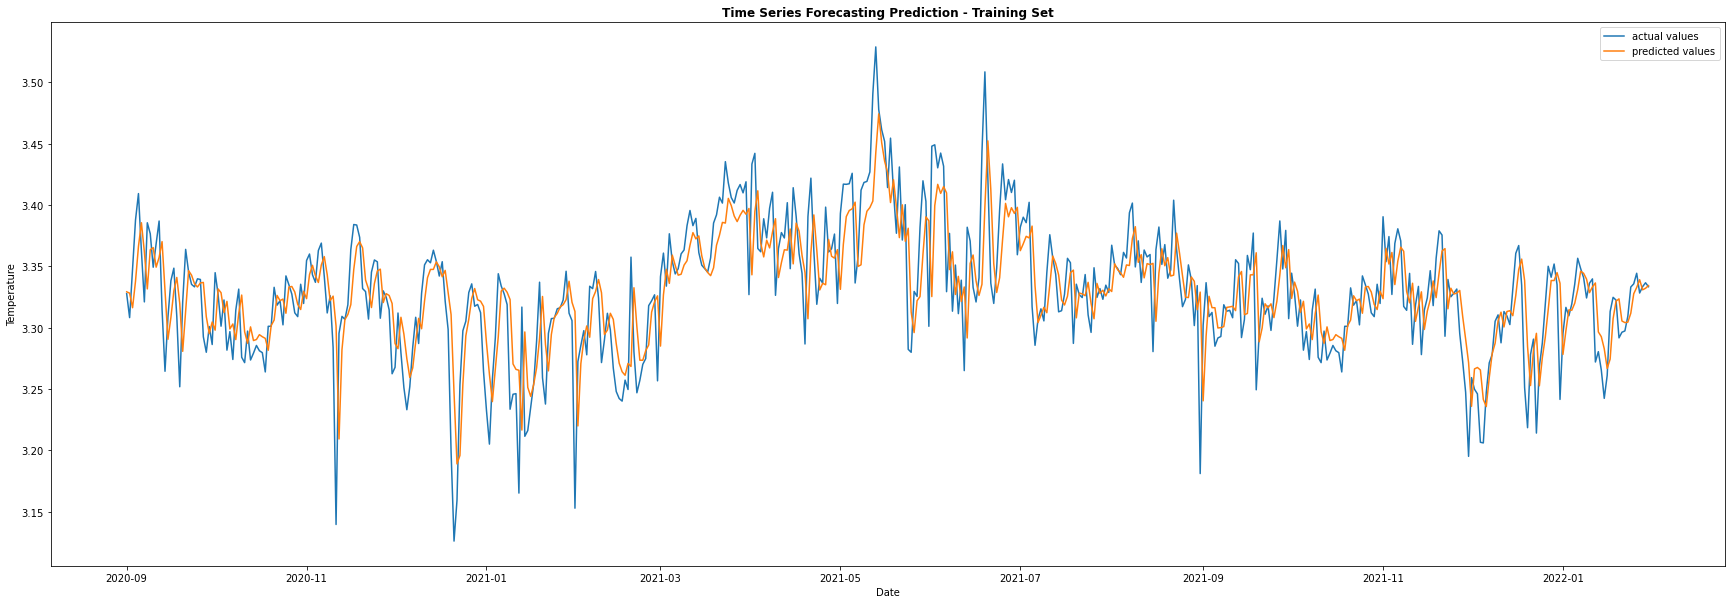

In [646]:
# visualization the result 

plt.figure(figsize=(30,10))

plt.plot(tem_train.index, tem_train.temperature, label = "actual values")
plt.plot(forecast_prediction ,label = "predicted values")

plt.title("Time Series Forecasting Prediction - Training Set", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Testing Set

In [635]:
# predict
start_test = datetime(2022, 1, 31)
end_test = datetime(2022, 3, 31)
forecast_testing = model_fit_test.predict(start=start_test, end=end_test)

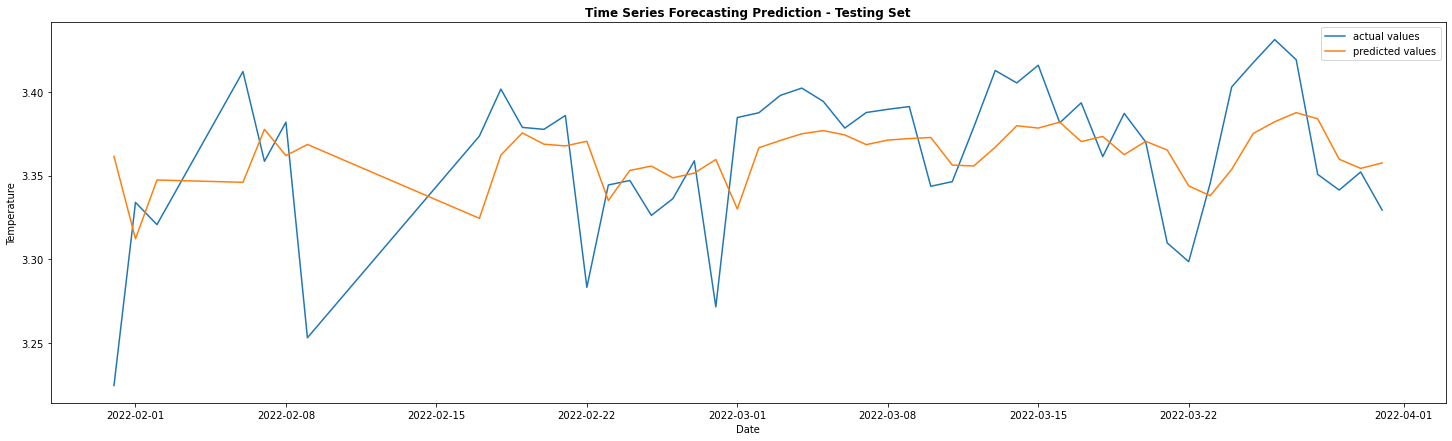

In [649]:
#draw the visual of testing set 

plt.figure(figsize=(25,7))
plt.plot(tem_test.index, tem_test.temperature, label = "actual values")
plt.plot(forecast_testing ,label = "predicted values")

plt.title("Time Series Forecasting Prediction - Testing Set", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

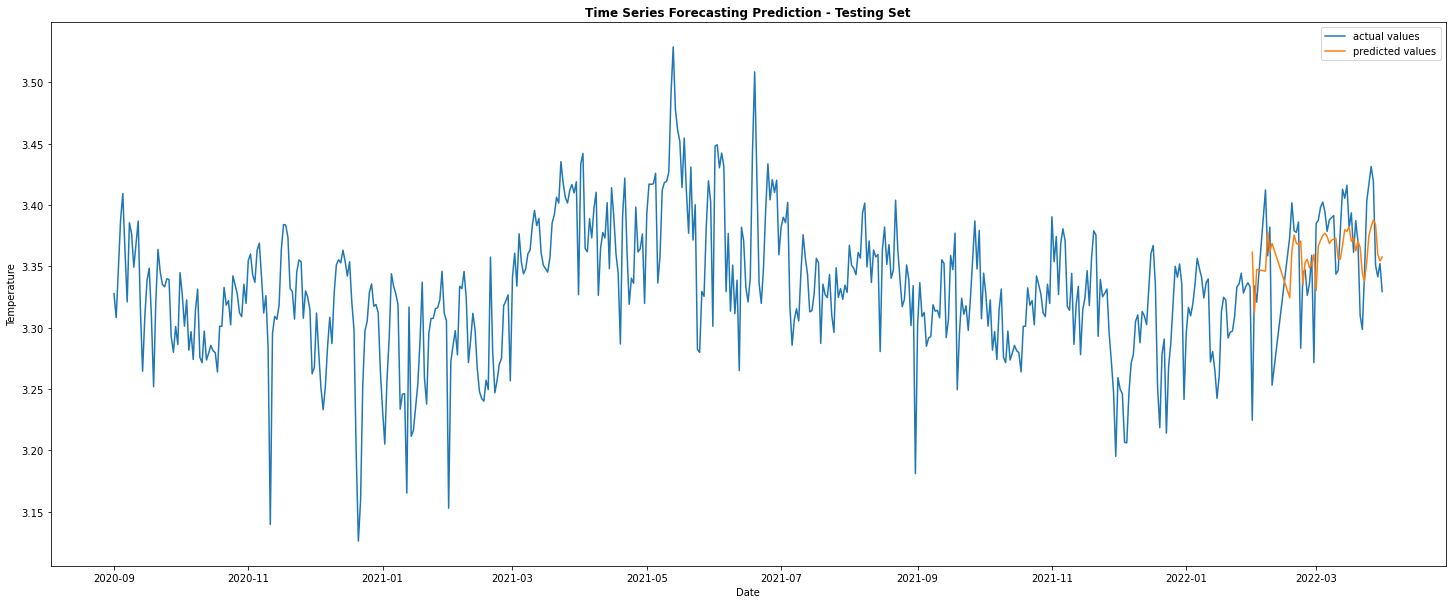

In [650]:
#draw the visual of testing set 

plt.figure(figsize=(25,10))
plt.plot(tem_logscale.index, tem_logscale.temperature, label = "actual values")
plt.plot(forecast_testing ,label = "predicted values")

plt.title("Time Series Forecasting Prediction - Testing Set", fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [651]:
#Training Set MAPE

from  sklearn.metrics import mean_absolute_percentage_error

mape_train = mean_absolute_percentage_error(tem_train.temperature, forecast_prediction)
print("**"*54)
print('Mean Absolute Percentage Erros (MAPE) Traning Set: %f' %mape_train)
print("**"*54)

************************************************************************************************************
Mean Absolute Percentage Erros (MAPE) Traning Set: 0.008211
************************************************************************************************************


In [652]:
#Testing Set MAPE 

mape_test = mean_absolute_percentage_error(tem_test.temperature, forecast_testing)
print("**"*54)
print('Mean Absolute Percentage Erros (MAPE) Traning Set: %f' %mape_test)
print("**"*54)

************************************************************************************************************
Mean Absolute Percentage Erros (MAPE) Traning Set: 0.009384
************************************************************************************************************


### 2. SARIMAX Algorithm Evaluation 

In [653]:
def plot_error_function(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Actual Values','Predicted Valyes'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors Versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

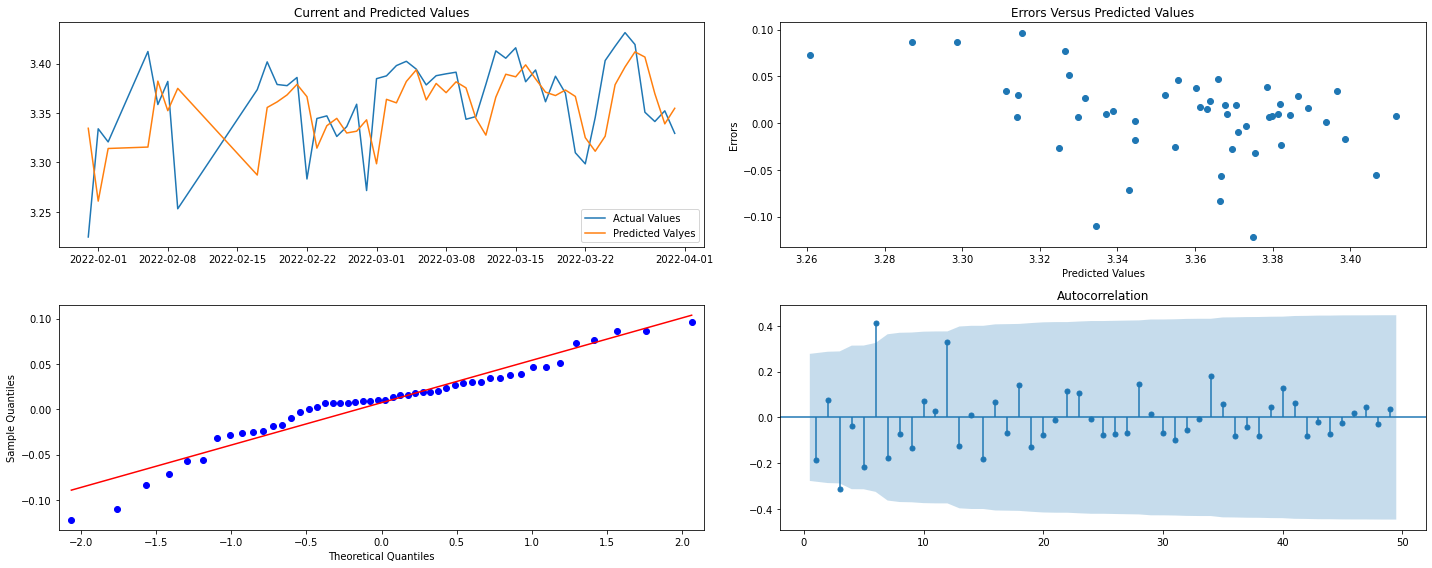

In [654]:
#let plot it out 
plot_error_function(valid_set)

Analyzing the plots above we can see that the predictions fit very well on the current values.

The Error vs Predicted values has a linear distribution (the errors are between -1.5 and +1.5 while the temperature increases).

The QQ Plot shows a normal pattern with some little outliers and,

The autocorrelation plot shows a positive spike over the confidence interval just above the second lag, but I believe that there is no need for more changes.

Finally it's time to extrapolate the prediction in the test set for the last 12 months

In [655]:
#Creating the new concatenating the training and validation set:
new_dataset = pd.concat([tem_train['temperature'], tem_test['temperature']])
new_dataset.head()

date
2020-09-01    3.327619
2020-09-02    3.308082
2020-09-03    3.348365
2020-09-04    3.387663
2020-09-05    3.409192
Name: temperature, dtype: float64

### Testing on SARIMAX Model & Set the same parameter

In [658]:
# Using the same parameters of the fitted model
sarimax_model = sm.tsa.statespace.SARIMAX(new_dataset, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c')
sarimax_model = sarimax_model.fit(disp=False)

In [659]:
#check the model summary 
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          temperature   No. Observations:                  567
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 12)   Log Likelihood                1003.140
Date:                              Sun, 23 Oct 2022   AIC                          -1994.280
Time:                                      15:19:15   BIC                          -1968.366
Sample:                                           0   HQIC                         -1984.157
                                              - 567                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.538e-05      0.000      0.546      0.585      -0.000       0.000
ar.L1          0.6144      0.033     18.684      0.000       0.550       0.679
ar.L2          0.0343      0.052      0.657      0.511      -0.068       0.137
ar.L3          0.1229      0.046      2.653      0.008       0.032       0.214
ma.S.L12      -0.9496      0.029    -32.456      0.000      -1.007      -0.892
sigma2         0.0015    7.2e-05     20.805      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                98.93
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.49
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""